## PCA

## MNIST

Датасет рукописных цифр

* Каждая цифра - черно-белая картинка 8x8 пикселей, закодированная массивом из 64 ячеек
* Каждая ячейка - цифра от 0 до 16, описывающая градацию серого цвета в этой ячейки
* Количество экземпляров: 1797
* Количество классов: 10
* Количество экземпляров на класс: ~180

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X_digits = digits.data

In [4]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

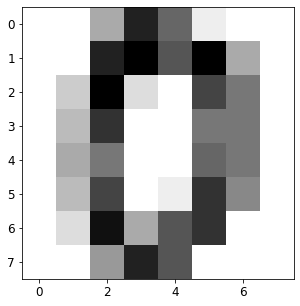

In [5]:
plt.imshow(X_digits[0].reshape(8, 8), cmap=plt.cm.binary)

### Уменьшим размерность

Text(0, 0.5, 'explained_variance_ratio_')

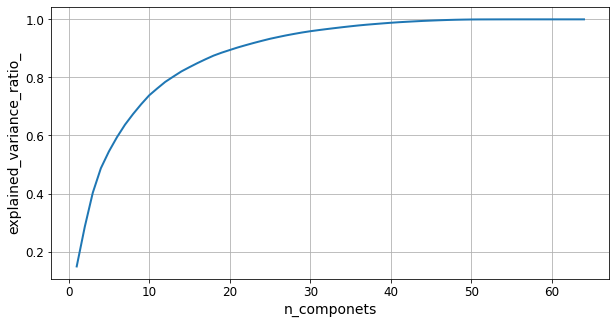

In [7]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_digits)

cum_avr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_avr.size) + 1
plt.plot(xs, cum_avr, linewidth=2)
plt.grid()
plt.xlabel('n_componets')
plt.ylabel('explained_variance_ratio_')

In [11]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137258,  3.3532481 ,  3.07880621,
        2.37234084,  2.27269657,  1.82186331,  1.77385494,  1.46710109,
        1.4097156 ,  1.3185892 ,  1.24813782,  1.01771796,  0.90561744,
        0.88953846,  0.79712316,  0.76749325,  0.72290357,  0.69588885,
        0.59608146,  0.57561469,  0.51515758,  0.48953978,  0.42888797,
        0.37360605,  0.35327422,  0.33668399,  0.32802985,  0.30832088,
        0.29377863,  0.25658861,  0.2277424 ,  0.22227792,  0.21143039,
        0.18990906,  0.15865291,  0.15115993,  0.14057876,  0.11662229,
        0.10749252,  0.09640531,  0.07746303,  0.05572116,  0.04043307,
        0.02099163,  0.00824797,  0.0052515 ,  0.00505244,  0.00329961,
        0.00124365,  0.00070483,  0.00030143,  0.00010623,  0.00005501,
        0.00003429,  0.        ,  0.        ,  0.        ])

In [12]:
pca.components_[-1]

array([ 1., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.])

Уже на 40 компонентах мы объяснили почти весь variance. Похоже на правду?

In [14]:
from sklearn.preprocessing import binarize
bin_X = binarize(X_digits).sum(axis=0) ## считаем сколько раз активизировалась каждая из 64 ячеек

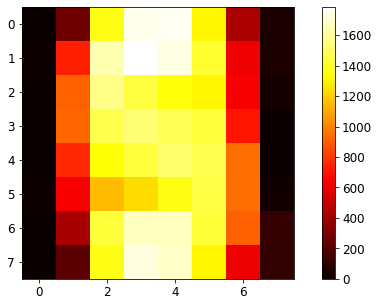

In [16]:
plt.imshow(bin_X.reshape(8, 8), plt.cm.hot)
plt.colorbar();